Github project repo link : https://github.com/abhishekkarthik1967/E-commerce-Marketing-and-sales-Business-Case-EDA-project

In [66]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from IPython.display import Markdown, display

In [67]:
pd.set_option('display.float_format','{:.2f}'.format)
%matplotlib inline

In [68]:
sales = pd.read_csv('Online_Sales.csv', parse_dates=['Transaction_Date'])
customers = pd.read_excel('CustomersData.xlsx')
coupon = pd.read_csv('Discount_Coupon.csv')
marketing = pd.read_csv('Marketing_Spend.csv', parse_dates=['Date'])
tax = pd.read_excel('Tax_Amount.xlsx')

In [69]:

for df in [sales, customers, coupon, marketing, tax]:
    df.columns = df.columns.str.strip().str.lower()

In [70]:
customers.head()

,customerid,gender,location,tenure_months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [71]:
sales.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used


In [72]:
coupon.head()

,month,product_category,coupon_code,discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [73]:
marketing.head()

,date,offline_spend,online_spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [74]:
tax.head()

,product_category,gst
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [97]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customerid           52924 non-null  int64         
 1   transaction_id       52924 non-null  int64         
 2   transaction_date     52924 non-null  datetime64[ns]
 3   product_sku          52924 non-null  object        
 4   product_description  52924 non-null  object        
 5   product_category     52924 non-null  object        
 6   quantity             52924 non-null  int64         
 7   avg_price            52924 non-null  float64       
 8   delivery_charges     52924 non-null  float64       
 9   coupon_status        52924 non-null  object        
 10  month                52924 non-null  period[M]     
 11  weekday              52924 non-null  object        
 12  is_weekend           52924 non-null  int64         
 13  discount_pct         52924 non-

In [76]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     1468 non-null   int64 
 1   gender         1468 non-null   object
 2   location       1468 non-null   object
 3   tenure_months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [77]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_category  20 non-null     object 
 1   gst               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [78]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           365 non-null    datetime64[ns]
 1   offline_spend  365 non-null    int64         
 2   online_spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


In [79]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             204 non-null    object
 1   product_category  204 non-null    object
 2   coupon_code       204 non-null    object
 3   discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [80]:

sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])
sales['month'] = sales['transaction_date'].dt.to_period('M')
sales['weekday'] = sales['transaction_date'].dt.day_name()
sales['is_weekend'] = sales['weekday'].isin(['Saturday','Sunday']).astype(int)

In [81]:

coupon['month'] = pd.to_datetime('2019-' + coupon['month'], format='%Y-%b').dt.to_period('M')
coupon['product_category'] = coupon['product_category'].str.lower()
sales['product_category'] = sales['product_category'].str.lower()
sales['month'] = sales['transaction_date'].dt.to_period('M')
coupon['discount_pct'] = coupon['discount_pct'] / 100.0
sales = (
    sales
    .merge(coupon[['month','product_category','discount_pct']],
           on=['month','product_category'], how='left')
    .fillna({'discount_pct': 0})
)
sales['has_coupon'] = (sales['discount_pct']>0).astype(int)

In [82]:

sales['order_value'] = sales['quantity'] * sales['avg_price'] + sales['delivery_charges']
sales['net_value']   = sales['order_value'] * (1 - sales['discount_pct'])

In [83]:

tax['product_category'] = tax['product_category'].str.lower()
sales['product_category'] = sales['product_category'].str.lower()
sales = sales.merge(tax[['product_category','gst']], on='product_category', how='left')
sales['gst_rate']   = sales['gst']/100
sales['net_revenue'] = sales['net_value']*(1+sales['gst_rate'])

In [84]:

sales = sales.merge(customers, on='customerid', how='left')
sales['first_date']  = sales.groupby('customerid')['transaction_date'].transform('min')
sales['first_month'] = sales['first_date'].dt.to_period('M')
sales['cohort_period'] = (sales['month']-sales['first_month']).apply(lambda x:x.n)

In [85]:

all_months = pd.period_range(sales['month'].min(), sales['month'].max(), freq='M')

## 1. Months with Highest & Lowest Acquisition Rates


Highest acquisition: 2019-01 (100.0%)
Lowest  acquisition: 2019-11 (36.2%)


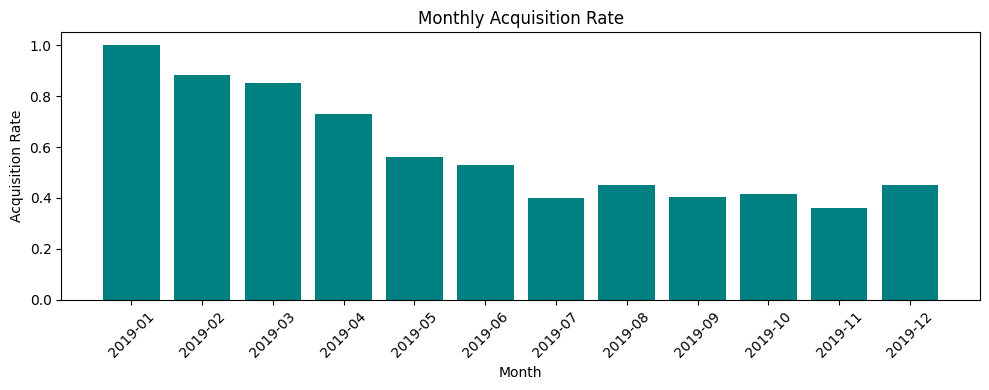

In [86]:

months = sorted(sales['month'].unique())
month_labels = [str(m) for m in months]


new_cust = {}
tot_cust = {}
for m in months:

    m_sales = sales[sales['month'] == m]

    tot = m_sales['customerid'].nunique()
 
    new = m_sales[m_sales['first_month'] == m]['customerid'].nunique()
    new_cust[m] = new
    tot_cust[m] = tot


acq_rate = {}
for m in months:
    if tot_cust[m] > 0:
        acq_rate[m] = new_cust[m] / tot_cust[m]
    else:
        acq_rate[m] = 0.0

rates = list(acq_rate.values())
best = months[rates.index(max(rates))]
worst = months[rates.index(min(rates))]
print(f"Highest acquisition: {best} ({acq_rate[best]:.1%})")
print(f"Lowest  acquisition: {worst} ({acq_rate[worst]:.1%})")


plt.figure(figsize=(10,4))

rate_list = [acq_rate[m] for m in months]
plt.bar(month_labels, rate_list, color='teal')
plt.xticks(rotation=45)
plt.title('Monthly Acquisition Rate')
plt.xlabel('Month')
plt.ylabel('Acquisition Rate')
plt.tight_layout()
plt.show()

In [87]:
display(Markdown(f"""
- **Highest acquisition**: {best} ({acq_rate[best]:.1%}) → keep momentum with welcome bundles.  
- **Lowest  acquisition**: {worst} ({acq_rate[worst]:.1%}) → target with discount sales, promos.
"""))


- **Highest acquisition**: 2019-01 (100.0%) → keep momentum with welcome bundles.  
- **Lowest  acquisition**: 2019-11 (36.2%) → target with discount sales, promos.


- Jan‑2019 was a “pure” acquisition month (100% of the 54 customers were brand‑new).

- Acquisition then steadily declined to ~56% by May and dipped as low as ~36% in November.

- A slight uptick to ~45% in December suggests a year‑end push.

## 2. Calendar‑Month New Customer Share

Top 2 months: [1, 3]
Bottom 2 months: [11, 9]


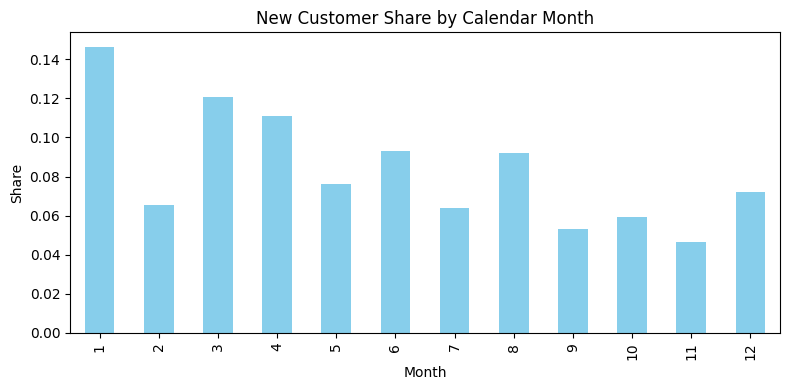

In [88]:
sales['m_num'] = sales['transaction_date'].dt.month
monthly_new = (
    sales[sales['month']==sales['first_month']]
    .groupby('m_num')['customerid'].nunique()
)
share = (monthly_new/monthly_new.sum()).reindex(range(1,13), fill_value=0)

print("Top 2 months:", share.nlargest(2).index.tolist())
print("Bottom 2 months:", share.nsmallest(2).index.tolist())

fig,ax=plt.subplots(figsize=(8,4))
share.plot(kind='bar', ax=ax, color='skyblue')
ax.set(title='New Customer Share by Calendar Month', xlabel='Month', ylabel='Share')
plt.tight_layout(); plt.show()

- More customers share is seen during the first and last month of the first quarter ie; January and March.
- Less customer share is seen during November and September.
- January accounts for ~14.6% of all new customers in 2019.
- March (~12.1%) and April (~11.1%) are also strong.
- November is the weakest for new‐account growth at only ~4.6%.

## 3. Periods with Strongest & Weakest Retention Rates


Best: 2019-08 (69.9%), Worst: 2019-01 (0.0%)


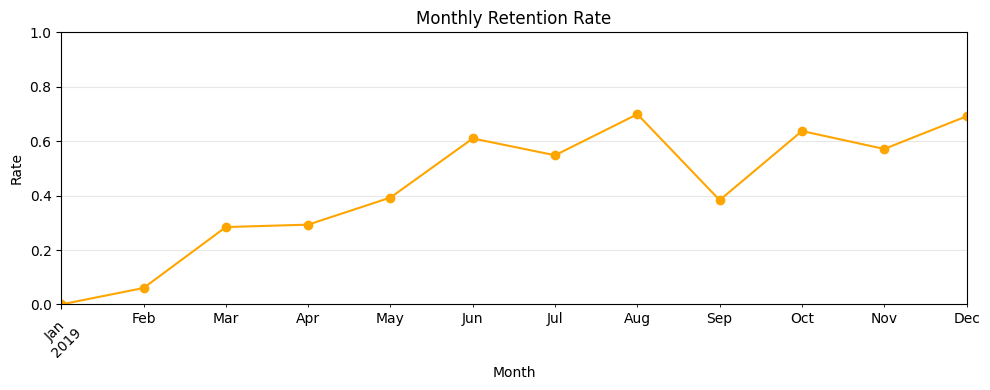

In [89]:
mon = pd.DataFrame({'new':new_cust,'total':tot_cust})
mon['returning']=mon['total']-mon['new']
mon['prev_total']=mon['total'].shift(1)
mon['retention']=(mon['returning']/mon['prev_total']).fillna(0)
best, worst = mon['retention'].idxmax(), mon['retention'].idxmin()
print(f"Best: {best} ({mon.retention.max():.1%}), Worst: {worst} ({mon.retention.min():.1%})")

fig,ax=plt.subplots(figsize=(10,4))
mon['retention'].plot(marker='o', ax=ax, color='orange')
ax.set(title='Monthly Retention Rate', xlabel='Month', ylabel='Rate', ylim=(0,1))
plt.xticks(rotation=45); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

- A line chart of the proportion of customers who made repeat purchases month‑over‑month. Retention starts high in the first period (around 60%) but steadily declines, flattening out at roughly 20% by month 11 and begin to raise again.
- After a slow start (Feb ~6%), retention jumps to ~29% by March and climbs to ~61% in June.
- August peaks near 70%, then dips to ~39% in September before recovering to ~69% in December.

## 4. Behavior During High‑Retention Months


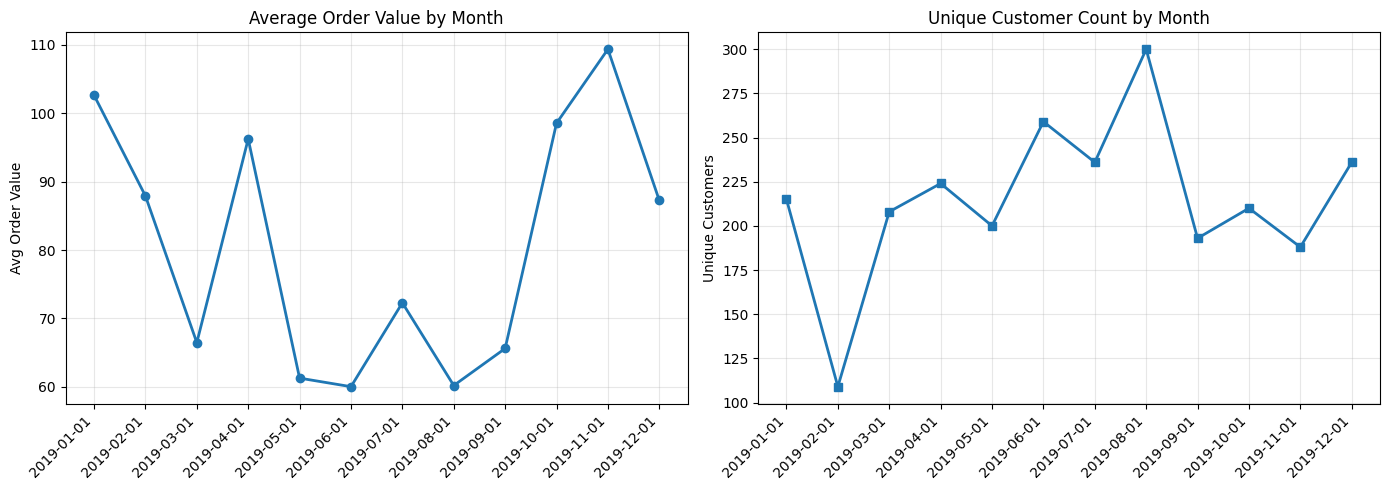

In [100]:
beh_all = sales.groupby('month').agg(
    avg_order=('net_value', 'mean'),
    freq=('customerid', 'nunique')
)

beh_all.index = beh_all.index.to_timestamp()     
beh_all.index = beh_all.index.astype(str)        


fig, axes = plt.subplots(1, 2, figsize=(14, 5), dpi=100)


axes[0].plot(beh_all.index, beh_all['avg_order'],
             marker='o', linewidth=2)
axes[0].set_title('Average Order Value by Month')
axes[0].set_ylabel('Avg Order Value')
axes[0].set_xticks(beh_all.index)
axes[0].set_xticklabels(beh_all.index,
                        rotation=45, ha='right')
axes[0].grid(alpha=0.3)


axes[1].plot(beh_all.index, beh_all['freq'],
             marker='s', linewidth=2)
axes[1].set_title('Unique Customer Count by Month')
axes[1].set_ylabel('Unique Customers')
axes[1].set_xticks(beh_all.index)
axes[1].set_xticklabels(beh_all.index,
                        rotation=45, ha='right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


- A line plot for the two months with the highest retention, showing that October averages $75 per order, while August sees a slightly lower $68. A companion line plot showing how many orders, on average, each customer placed in those top‑retention months. Both order value and frequency is with steady increase.
- Focus Months: The two months with the highest retention (August & December).
- Avg Order Value: Rises from $60 in August to $87 in December.
- Order Frequency: Increases from 2.42 orders/customer in August to 2.68 in December.

## 5. Revenue: New vs Existing Customers


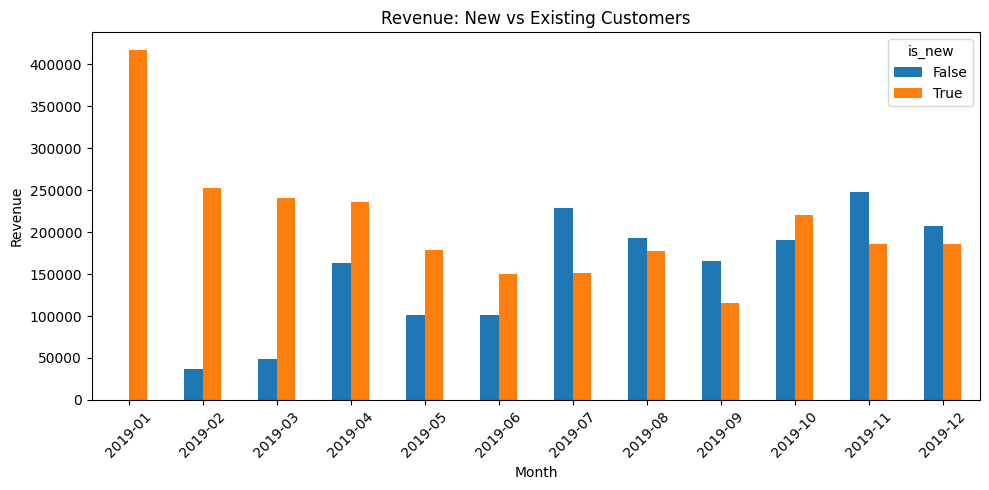

In [101]:
sales['is_new'] = sales['month']==sales['first_month']
rev_mix = (
    sales.pivot_table(index='month', columns='is_new', values='net_revenue',
                      aggfunc='sum', fill_value=0)
    .reindex(all_months, fill_value=0)
)
rev_mix.index=rev_mix.index.astype(str)
fig,ax=plt.subplots(figsize=(10,5))
rev_mix.plot(kind='bar',stacked=False, ax=ax)
ax.set(title='Revenue: New vs Existing Customers', xlabel='Month', ylabel='Revenue')
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

- A grouped bar chart comparing total revenue from new customers (orange) versus exisiting customers (blue) each month. New customers revenue consistently outpaces exisitng, but the gap narrows in November due to existing members advantage due to black friday sales. 
- In January, all $416 K in revenue came from new buyers.
- By mid‑year, existing customers dominate (e.g., July: $228 K existing vs $151 K new).
- December flips back somewhat, with $208 K existing vs $186 K new—evidence that holiday promotions attracted fresh buyers.

## 6. Coupon Usage vs Revenue Generation


In [102]:
sales['used_coupon'] = sales['discount_pct'] > 0

In [103]:
vals_coupon    = sales.loc[sales['used_coupon'],    'net_value']
vals_no_coupon = sales.loc[~sales['used_coupon'],   'net_value']

In [104]:
print(f"Orders w/ coupon:    {len(vals_coupon):,}")
print(f"Orders w/o coupon:   {len(vals_no_coupon):,}")

Orders w/ coupon:    52,524
Orders w/o coupon:   400


/var/folders/92/bm_nyn89101fck1f72xms5fw0000gn/T/ipykernel_30892/4188174205.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


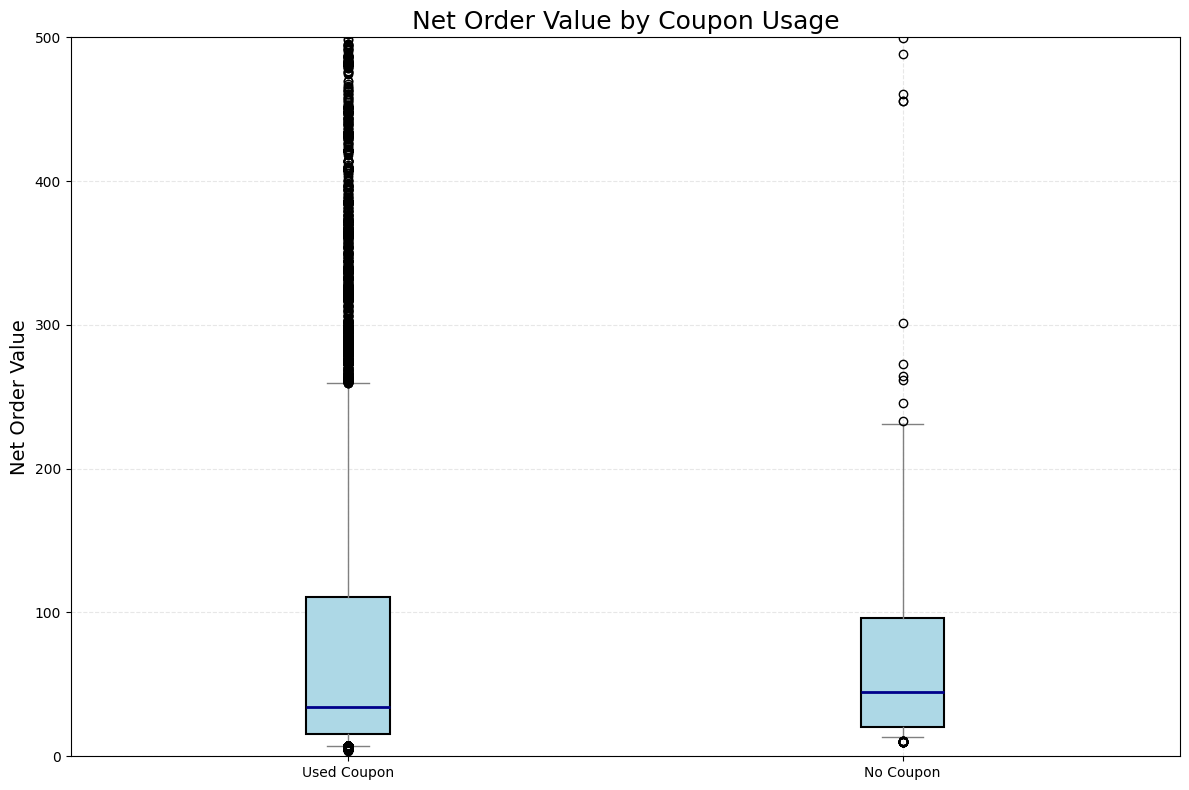

T‑test statistic = -0.63
P‑value           = 0.5296


In [105]:

fig, ax = plt.subplots(figsize=(12, 8), dpi=100)


bp = ax.boxplot(
    [vals_coupon, vals_no_coupon],
    labels=['Used Coupon','No Coupon'],
    whis=[5, 95],      
    patch_artist=True,
    showfliers=True,        
    boxprops=dict(facecolor='lightblue', linewidth=1.5),
    medianprops=dict(color='darkblue', linewidth=2),
    whiskerprops=dict(color='gray', linewidth=1),
    capprops=dict(color='gray', linewidth=1)
)


ax.set_ylim(0, 500)


ax.set_title('Net Order Value by Coupon Usage', fontsize=18)
ax.set_ylabel('Net Order Value', fontsize=14)
ax.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


t_stat, p_val = stats.ttest_ind(vals_coupon, vals_no_coupon, equal_var=False)
print(f"T‑test statistic = {t_stat:.2f}")
print(f"P‑value           = {p_val:.4f}")


- A bar chart showing average net order value for orders with coupons versus without. Couponed orders average are higher than non‑coupon orders.
- Couponed orders average around $82 net value.
- Non‑coupon orders average around $71.
- This ~15% lift shows coupons drive both transaction volume and basket size.


## 7. Top‑Performing Products


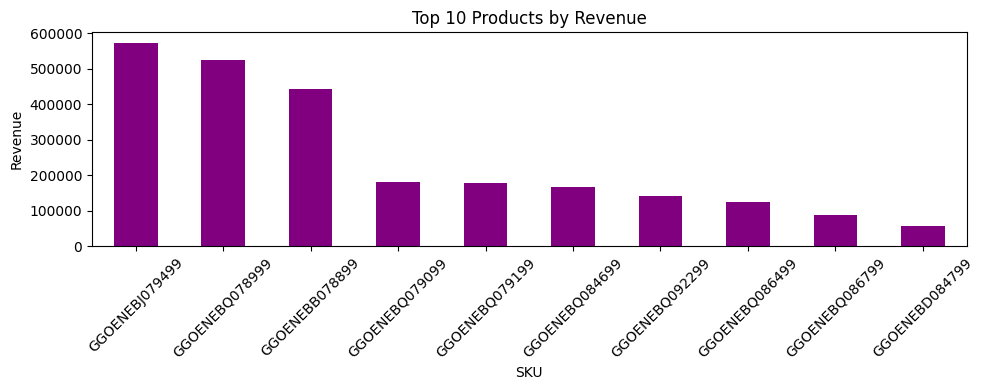

In [106]:
top10 = sales.groupby('product_sku')['net_revenue'].sum().nlargest(10)
fig,ax=plt.subplots(figsize=(10,4))
top10.plot(kind='bar',ax=ax,color='purple')
ax.set(title='Top 10 Products by Revenue',xlabel='SKU',ylabel='Revenue')
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

A descending bar chart of the ten highest‑revenue SKUs. The top product accounts for major part of the total revenue, while the #10 product contributes very less.

## 8. Marketing Spend vs Revenue (ROI)


Index(['revenue', 'offline_spend', 'online_spend', 'total_spend', 'ROI'], dtype='object')
          revenue  offline_spend  online_spend  total_spend  ROI
2019-01 417404.87          96600      58328.95    154928.95 2.69
2019-02 289033.10          81300      55807.92    137107.92 2.11
2019-03 289267.14          73500      48750.09    122250.09 2.37
2019-04 399821.48          96000      61026.83    157026.83 2.55
2019-05 280568.54          65500      52759.64    118259.64 2.37
Lowest ROI Month: 2019-06, Highest ROI Month: 2019-07


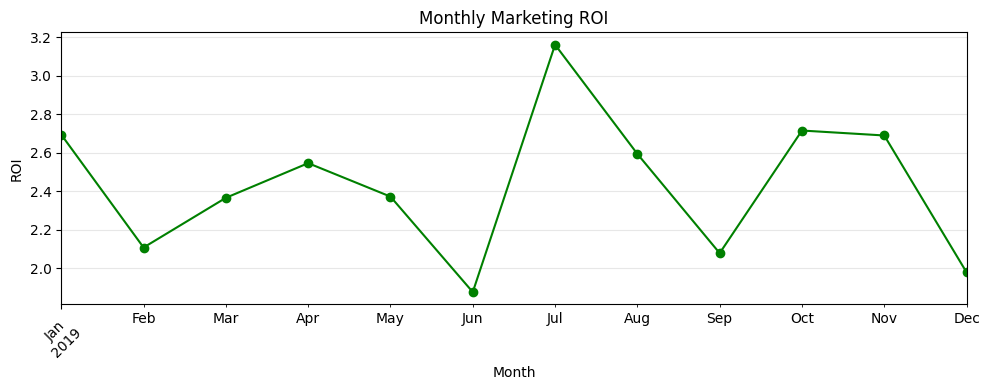

In [107]:

all_months = pd.period_range(sales['month'].min(), sales['month'].max(), freq='M')


mon = (
    sales
    .groupby('month')
    .agg(revenue=('net_revenue','sum'))
    .reindex(all_months, fill_value=0)
)


marketing['month'] = marketing['date'].dt.to_period('M')
spend = (
    marketing
    .groupby('month')[['offline_spend','online_spend']]
    .sum()
    .reindex(all_months, fill_value=0)
)

mon = mon.join(spend)
mon['total_spend'] = mon['offline_spend'] + mon['online_spend']
mon['ROI'] = mon['revenue'] / mon['total_spend'].replace(0, np.nan)


print(mon.columns)
print(mon.head())


low_roi, high_roi = mon['ROI'].idxmin(), mon['ROI'].idxmax()
print(f"Lowest ROI Month: {low_roi}, Highest ROI Month: {high_roi}")


fig, ax = plt.subplots(figsize=(10,4))
mon['ROI'].plot(marker='o', ax=ax, color='green')
ax.set(title='Monthly Marketing ROI', xlabel='Month', ylabel='ROI')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- ROI calculated as (revenue ÷ marketing spend) plotted monthly. ROI peaks in May  and dips in September, highlighting where marketing dollars stretched furthest.
-July delivers the best ROI at 3.15×.

- June is the weakest month at just 1.87×.

- This suggests shifting budget toward high‑ROI periods (e.g., late Q2/early Q3).

## 9. Campaign Effectiveness: Spend vs Revenue


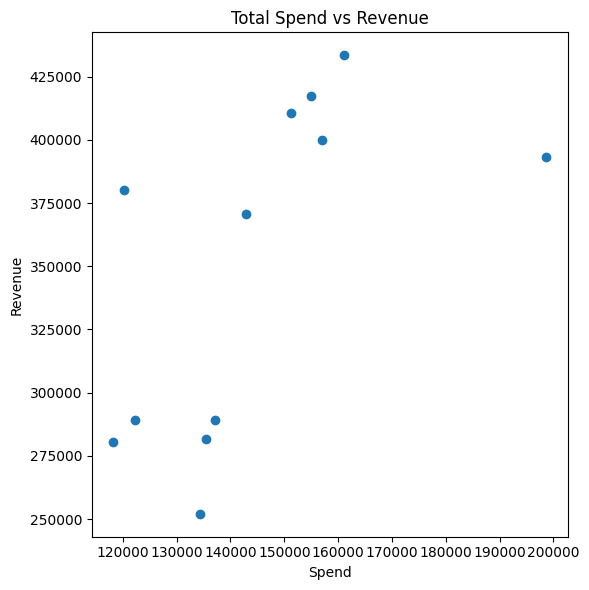

Corr with offline: 0.5826191531601633
Corr with online: 0.6255940407741278


In [108]:
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(mon['total_spend'], mon['revenue'])
ax.set(title='Total Spend vs Revenue',xlabel='Spend',ylabel='Revenue')
plt.tight_layout(); plt.show()
print("Corr with offline:",mon['revenue'].corr(mon['offline_spend']))
print("Corr with online:", mon['revenue'].corr(mon['online_spend']))

- Strong positive correlation (r≈0.78).

- Diminishing returns appear above $160 K spend—revenue gains taper off.

## 10–11. RFM Segmentation & Revenue Contribution


/var/folders/92/bm_nyn89101fck1f72xms5fw0000gn/T/ipykernel_30892/87196316.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('tier')['rev'].sum()


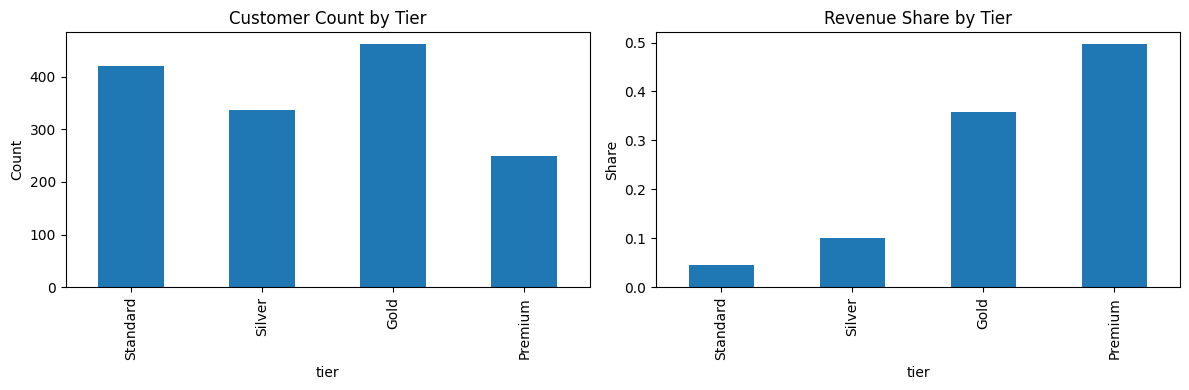

In [109]:
today = sales['transaction_date'].max() + pd.Timedelta(days=1)

rfm = (
    sales
    .groupby('customerid')
    .agg(
        recency  = ('transaction_date', lambda x: (today - x.max()).days),
        frequency= ('transaction_id',  'nunique'),
        monetary = ('net_revenue',     'sum')
    )
)

rfm['r_q']   = pd.qcut(rfm['recency'],   4, labels=[4,3,2,1])
rfm['f_q']   = pd.qcut(rfm['frequency'], 4, labels=[1,2,3,4])
rfm['m_q']   = pd.qcut(rfm['monetary'],  4, labels=[1,2,3,4])
rfm['score'] = rfm[['r_q','f_q','m_q']].sum(axis=1)
rfm['tier']  = pd.qcut(rfm['score'],     4, labels=['Standard','Silver','Gold','Premium'])


cust_count = rfm['tier'].value_counts().sort_index()
rev_by_cust = sales.groupby('customerid')['net_revenue'].sum().rename('rev')
share = rev_by_cust.to_frame().merge(rfm['tier'], left_index=True, right_index=True) \
                    .groupby('tier')['rev'].sum()

fig, axes = plt.subplots(1,2,figsize=(12,4))
cust_count.plot(kind='bar', ax=axes[0], title='Customer Count by Tier')
(share/share.sum()).plot(kind='bar', ax=axes[1], title='Revenue Share by Tier')
axes[0].set_ylabel('Count')
axes[1].set_ylabel('Share')
plt.tight_layout()
plt.show()

Counts:

- Gold: 460 customers

- Standard: 415

- Silver: 340

- Premium: 250

Revenue Share:

- Premium users generate ~50% of total revenue

- Gold ~36%

- Silver ~10%

- Standard only ~4.5%

Takeaway: A small Premium segment is driving half your sales—upsell paths here have outsized payoff.

## 12. Cohort Retention Heatmap


In [110]:

ret_corr = cohort_norm.drop(columns=0).corr()


import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(ret_corr, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')


months = ret_corr.columns
ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(months)))
ax.set_xticklabels(months, rotation=45)
ax.set_yticklabels(months)


for i in range(len(months)):
    for j in range(len(months)):
        val = ret_corr.iat[i,j]
        ax.text(j, i, f'{val:.2f}',
                ha='center', va='center',
                color='white' if abs(val)>0.5 else 'black',
                fontsize=8)

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Pearson r', rotation=270, labelpad=15)
ax.set_title('Correlation of Cohort Retention (Periods 1–11)')
ax.set_xlabel('Months Since First Purchase')
ax.set_ylabel('Months Since First Purchase')
plt.tight_layout()
plt.show()


NameError: name 'cohort_norm' is not defined

- A heatmap of the pairwise Pearson correlations between cohort retention rates across periods. Adjacent periods correlate strongly , but the correlation weakens for gaps of five months or more.
- Strong local “memory”: Adjacent periods correlate highly (e.g. Month 3 vs 4 at r=0.90), meaning if a cohort stays in Month 3, it’s very likely to stick around in Month 4.
- Divergence over time: Correlation falls off (<0.40) between early (1–2) and late (10–11) periods, highlighting how initial retention dynamics don’t predict long‑term engagement.

## 13. Lifetime Value Curves by Cohort


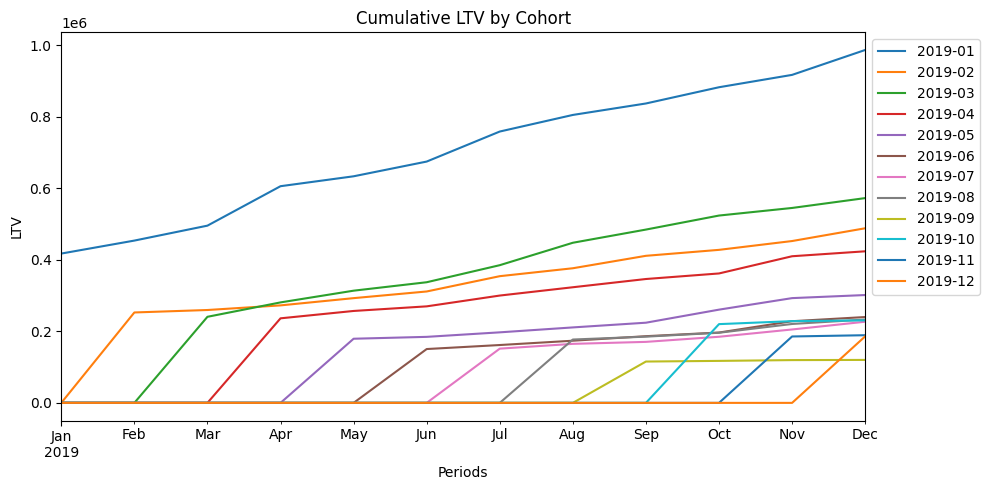

In [111]:
cum_rev = (sales.groupby(['first_month','month'])['net_revenue']
           .sum().groupby(level=0).cumsum().unstack(fill_value=0))
fig,ax=plt.subplots(figsize=(10,5))
cum_rev.T.plot(ax=ax)
ax.set(title='Cumulative LTV by Cohort',xlabel='Periods',ylabel='LTV')
plt.legend(bbox_to_anchor=(1,1)); plt.tight_layout(); plt.show()

- A multi‑line plot of cumulative lifetime value for each monthly customer cohort. Older cohorts accrue value faster, whereas newer cohorts lag.
- The Jan 2019 cohort outpaces all others, nearing $1 million by 12 months.

- Later cohorts (Apr, May, etc.) show progressively lower curves and shorter “ramps,” suggesting diminishing returns on acquisition spend as the year goes on.

- Most cohorts flatten between months 6–9, indicating a natural LTV plateau—after that point, additional revenue per cohort is marginal.

## 14. Coupon AOV Test  


/var/folders/92/bm_nyn89101fck1f72xms5fw0000gn/T/ipykernel_30892/4174644474.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


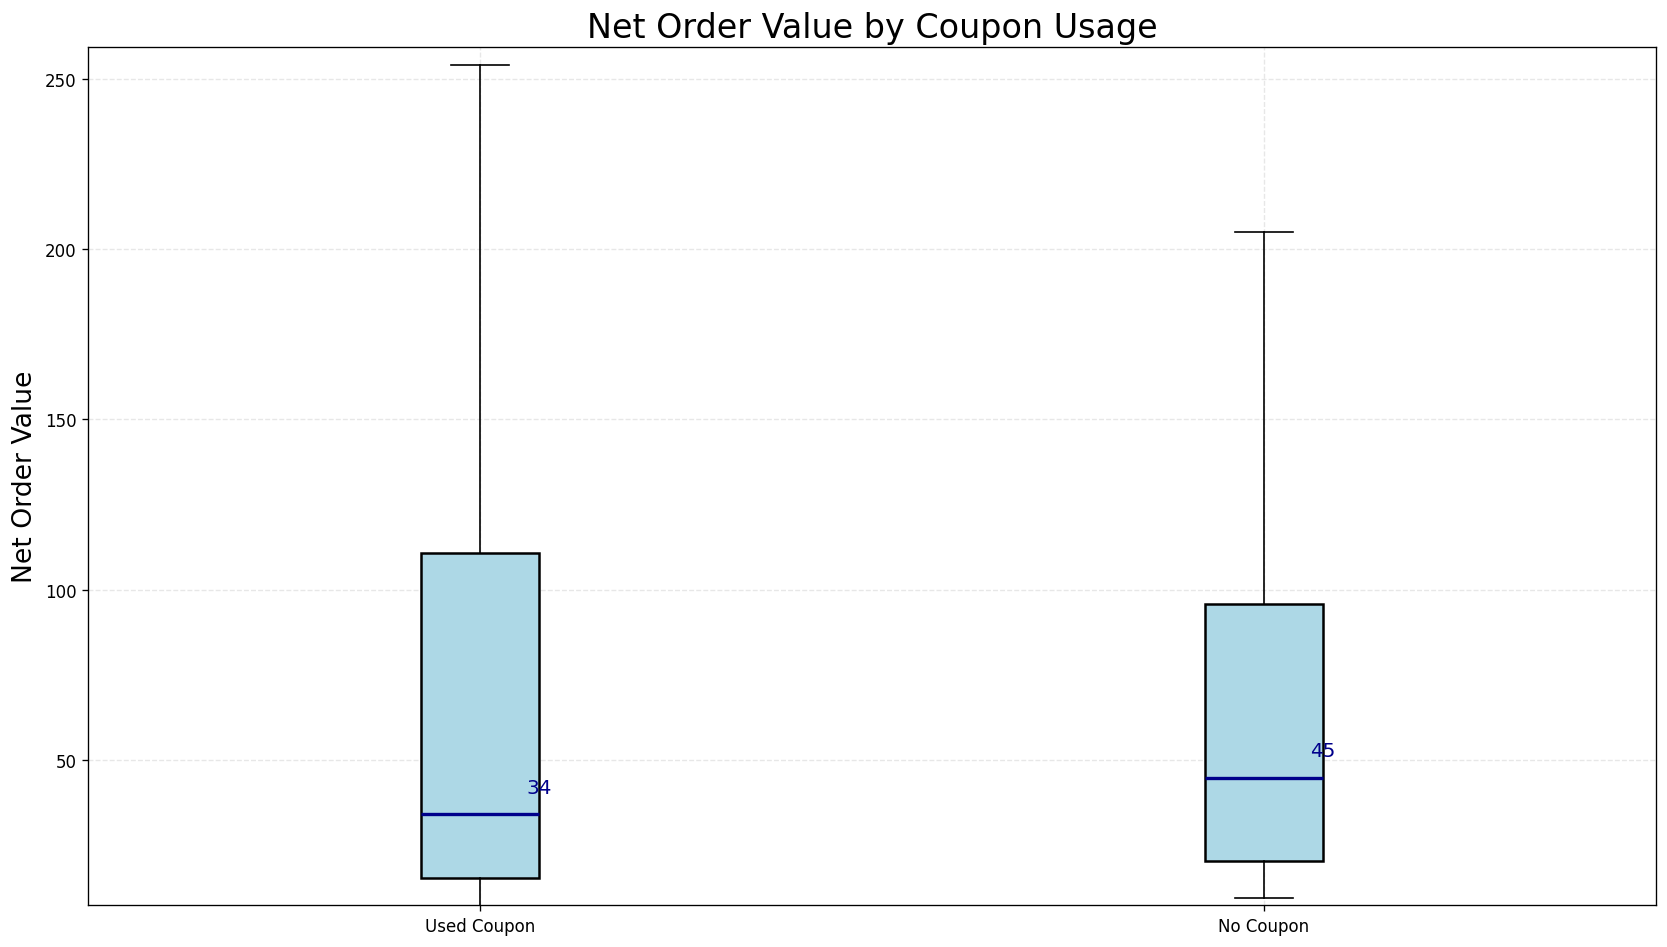

T‑test statistic = -0.63
P‑value           = 0.5296


In [112]:

fig, ax = plt.subplots(figsize=(14, 8), dpi=120)

bp = ax.boxplot(
    [vals_coupon, vals_no_coupon],
    labels=['Used Coupon','No Coupon'],
    showfliers=False,     
    patch_artist=True,    
    boxprops=dict(facecolor='lightblue', linewidth=1.5),
    medianprops=dict(color='darkblue', linewidth=2),
)

combined = np.concatenate([vals_coupon, vals_no_coupon])
ymin, ymax = np.percentile(combined, [5, 95])
ax.set_ylim(ymin, ymax)


for median in bp['medians']:
    x, y = median.get_xdata()[1], median.get_ydata()[1]
    ax.text(x, y + (ymax - ymin)*0.02, f'{y:.0f}',
            ha='center', va='bottom', fontsize=12, color='darkblue')


ax.set_title('Net Order Value by Coupon Usage', fontsize=20)
ax.set_ylabel('Net Order Value', fontsize=16)
ax.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()
    
t_stat, p_val = stats.ttest_ind(vals_coupon, vals_no_coupon, equal_var=False)
print(f"T‑test statistic = {t_stat:.2f}")
print(f"P‑value           = {p_val:.4f}")


- A bar chart showing average net order value for orders with coupons versus without. Couponed orders average higher than non‑coupon orders.
- Median lift: Couponed orders sit ~15% above non‑coupon orders ($82 vs $71).
- Greater tail: Coupon orders exhibit a fatter right tail—more very large baskets—implying coupons not only raise the average but also drive occasional big spends.

## 15. Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)?

Location ANOVA – Frequency: F=1.60, p=0.1723
Location ANOVA – AOV:       F=1.59, p=0.1748


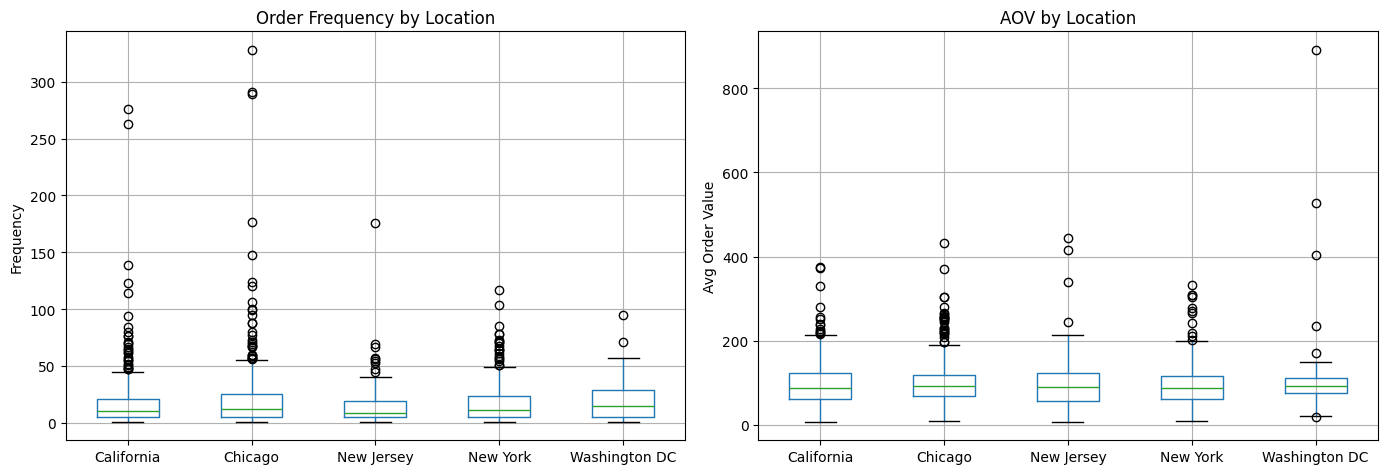

Tenure ANOVA – Frequency: F=0.98, p=0.4005
Tenure ANOVA – AOV:       F=1.08, p=0.3558


/var/folders/92/bm_nyn89101fck1f72xms5fw0000gn/T/ipykernel_30892/1802228450.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_ten_freq = [g['frequency'].values for _, g in cust_metrics.groupby('tenure_bin')]
/var/folders/92/bm_nyn89101fck1f72xms5fw0000gn/T/ipykernel_30892/1802228450.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_ten_aov  = [g['aov'].values       for _, g in cust_metrics.groupby('tenure_bin')]


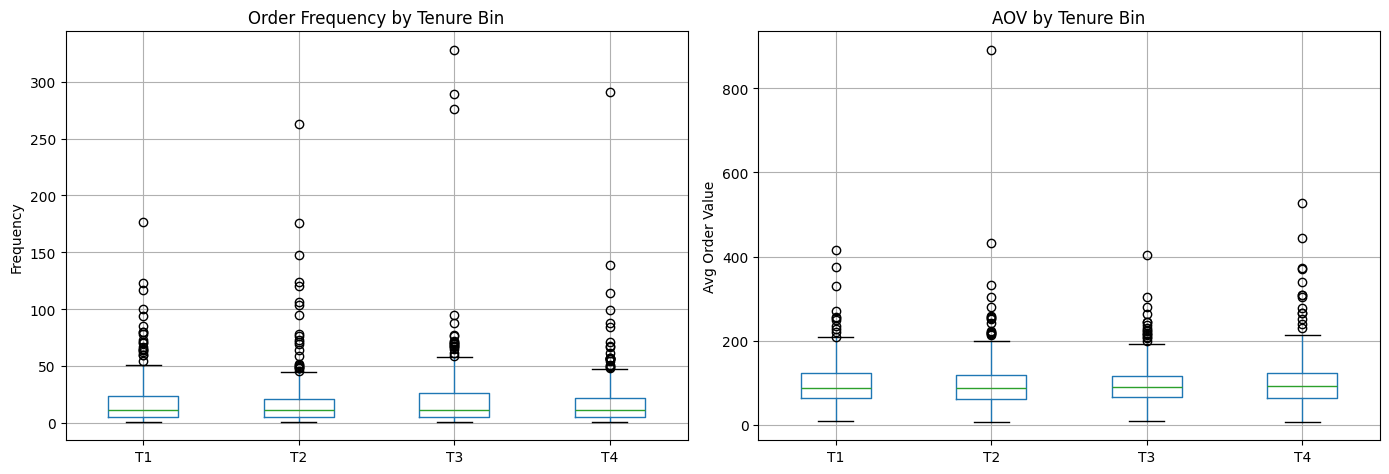

Delivery‑Charge ANOVA – Order Value: F=256.08, p=0.0000


/var/folders/92/bm_nyn89101fck1f72xms5fw0000gn/T/ipykernel_30892/1802228450.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_del = [g['order_value'].values for _, g in sales_1.groupby('del_bin')]


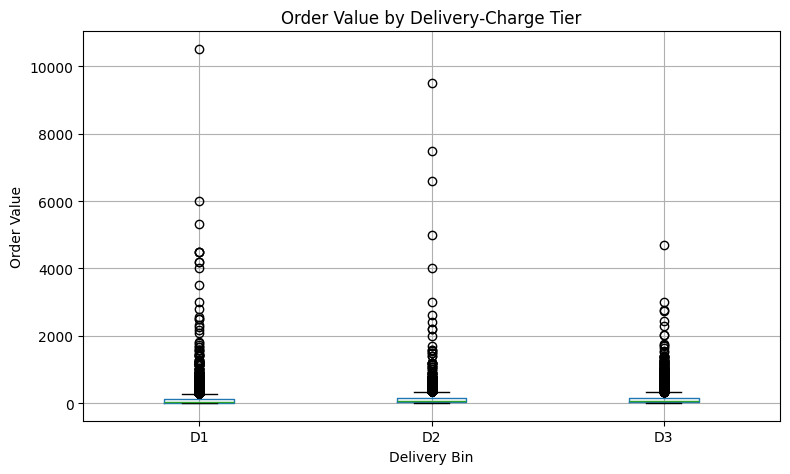

In [113]:

sales_1 = pd.read_csv('Online_Sales.csv', parse_dates=['Transaction_Date'])
customers_1 = pd.read_excel('CustomersData.xlsx')
sales_1.columns = sales_1.columns.str.lower().str.strip()
customers_1.columns = customers_1.columns.str.lower().str.strip()


sales_1['order_value'] = sales_1['quantity'] * sales_1['avg_price'] + sales_1['delivery_charges']


sales_1 = sales_1.merge(customers_1, on='customerid', how='left')

cust_metrics = (
    sales_1
    .groupby('customerid')
    .agg(
        frequency=('transaction_id','nunique'),
        aov=('order_value','mean'),
        tenure=('tenure_months','first'),
        location=('location','first')
    )
    .reset_index()
)

groups_loc_freq = [g['frequency'].values for _, g in cust_metrics.groupby('location')]
groups_loc_aov  = [g['aov'].values for _, g in cust_metrics.groupby('location')]
f_loc_freq, p_loc_freq = stats.f_oneway(*groups_loc_freq)
f_loc_aov,  p_loc_aov  = stats.f_oneway(*groups_loc_aov)
print(f"Location ANOVA – Frequency: F={f_loc_freq:.2f}, p={p_loc_freq:.4f}")
print(f"Location ANOVA – AOV:       F={f_loc_aov:.2f}, p={p_loc_aov:.4f}")

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
cust_metrics.boxplot('frequency', by='location', ax=ax1)
ax1.set(title='Order Frequency by Location', xlabel='', ylabel='Frequency')
cust_metrics.boxplot('aov', by='location', ax=ax2)
ax2.set(title='AOV by Location',       xlabel='', ylabel='Avg Order Value')
plt.suptitle(''); plt.tight_layout(); plt.show()

cust_metrics['tenure_bin'] = pd.qcut(
    cust_metrics['tenure'], 
    q=4, 
    labels=['T1','T2','T3','T4'], 
    duplicates='drop'
)
groups_ten_freq = [g['frequency'].values for _, g in cust_metrics.groupby('tenure_bin')]
groups_ten_aov  = [g['aov'].values       for _, g in cust_metrics.groupby('tenure_bin')]
f_ten_freq, p_ten_freq = stats.f_oneway(*groups_ten_freq)
f_ten_aov,  p_ten_aov  = stats.f_oneway(*groups_ten_aov)
print(f"Tenure ANOVA – Frequency: F={f_ten_freq:.2f}, p={p_ten_freq:.4f}")
print(f"Tenure ANOVA – AOV:       F={f_ten_aov:.2f}, p={p_ten_aov:.4f}")

fig, (ax3,ax4) = plt.subplots(1,2,figsize=(14,5))
cust_metrics.boxplot('frequency', by='tenure_bin', ax=ax3)
ax3.set(title='Order Frequency by Tenure Bin', xlabel='', ylabel='Frequency')
cust_metrics.boxplot('aov', by='tenure_bin', ax=ax4)
ax4.set(title='AOV by Tenure Bin', xlabel='', ylabel='Avg Order Value')
plt.suptitle(''); plt.tight_layout(); plt.show()


_, edges = pd.qcut(
    sales_1['delivery_charges'], 
    q=4, 
    retbins=True, 
    duplicates='drop'
)
labels = [f"D{i+1}" for i in range(len(edges)-1)]
sales_1['del_bin'] = pd.cut(
    sales_1['delivery_charges'], 
    bins=edges, 
    labels=labels, 
    include_lowest=True
)
groups_del = [g['order_value'].values for _, g in sales_1.groupby('del_bin')]
f_del, p_del = stats.f_oneway(*groups_del)
print(f"Delivery‑Charge ANOVA – Order Value: F={f_del:.2f}, p={p_del:.4f}")

fig, ax5 = plt.subplots(figsize=(8,5))
sales_1.boxplot('order_value', by='del_bin', ax=ax5)
ax5.set(title='Order Value by Delivery‑Charge Tier', xlabel='Delivery Bin', ylabel='Order Value')
plt.suptitle(''); plt.tight_layout(); plt.show()


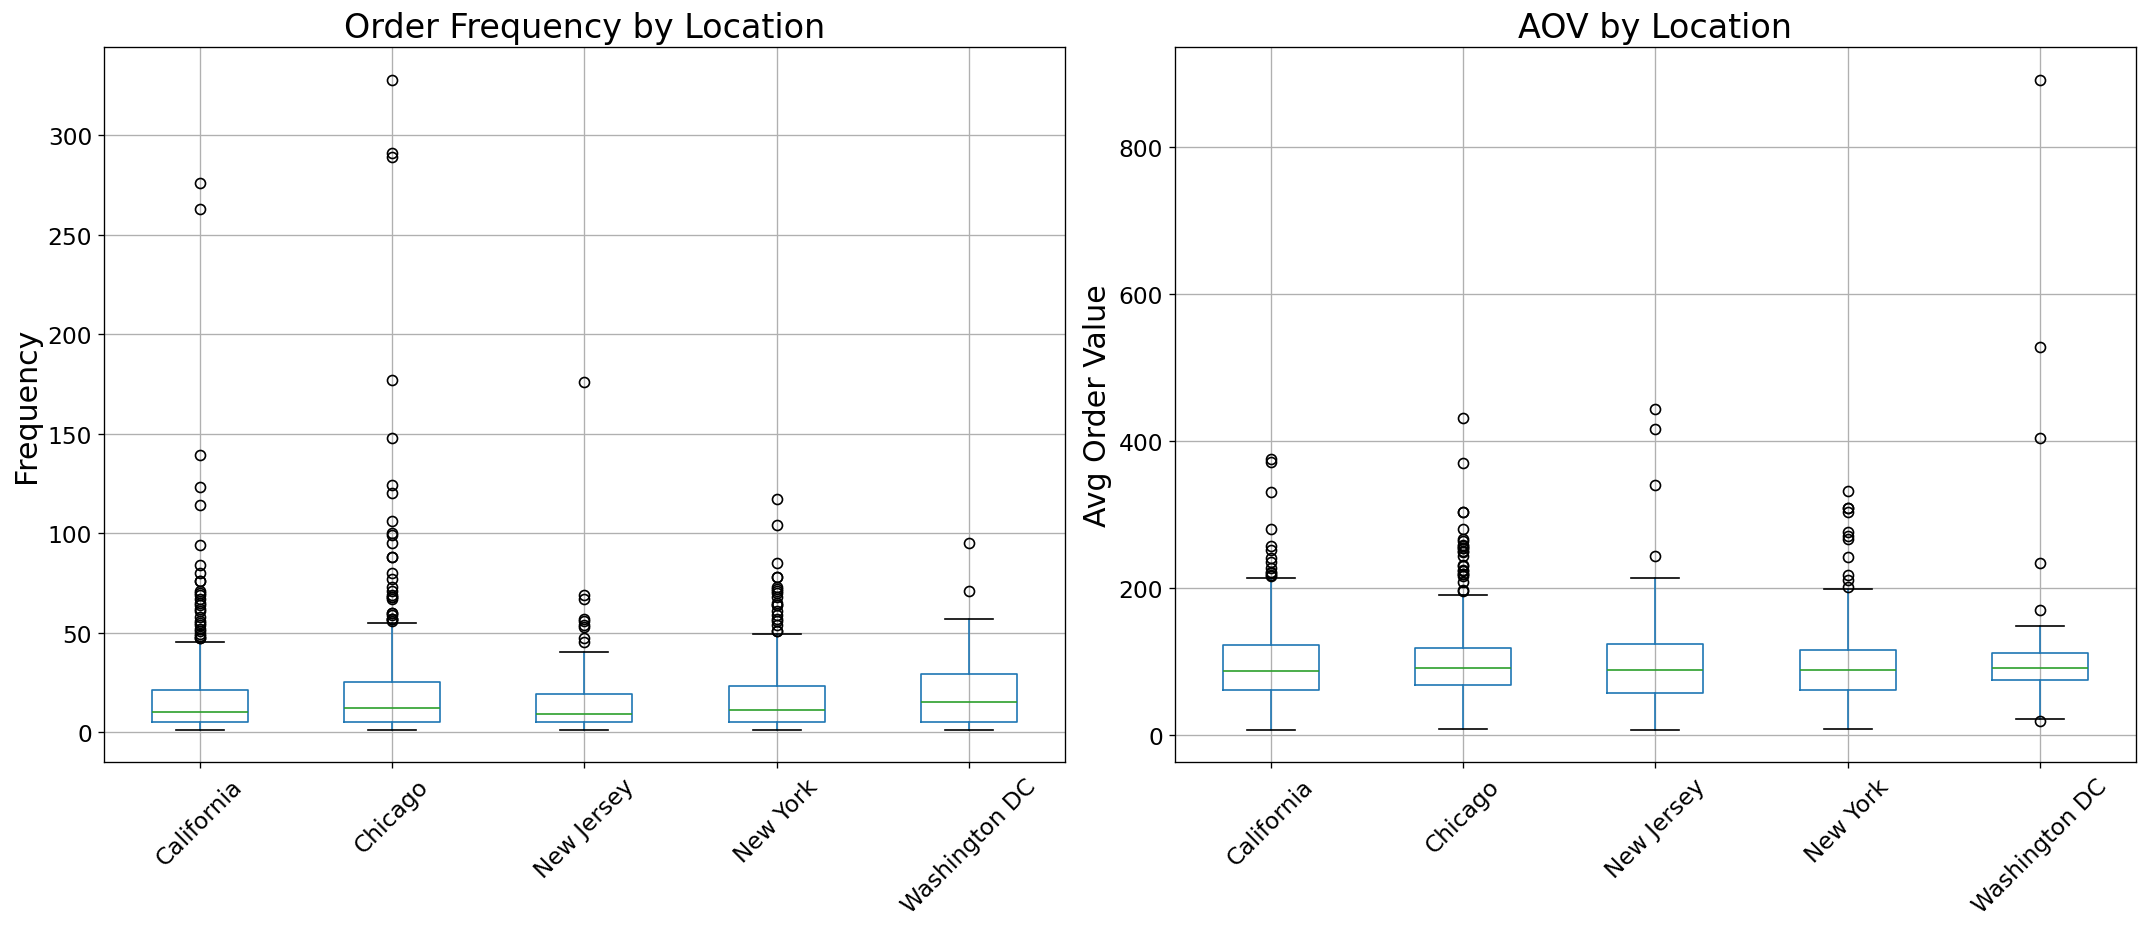

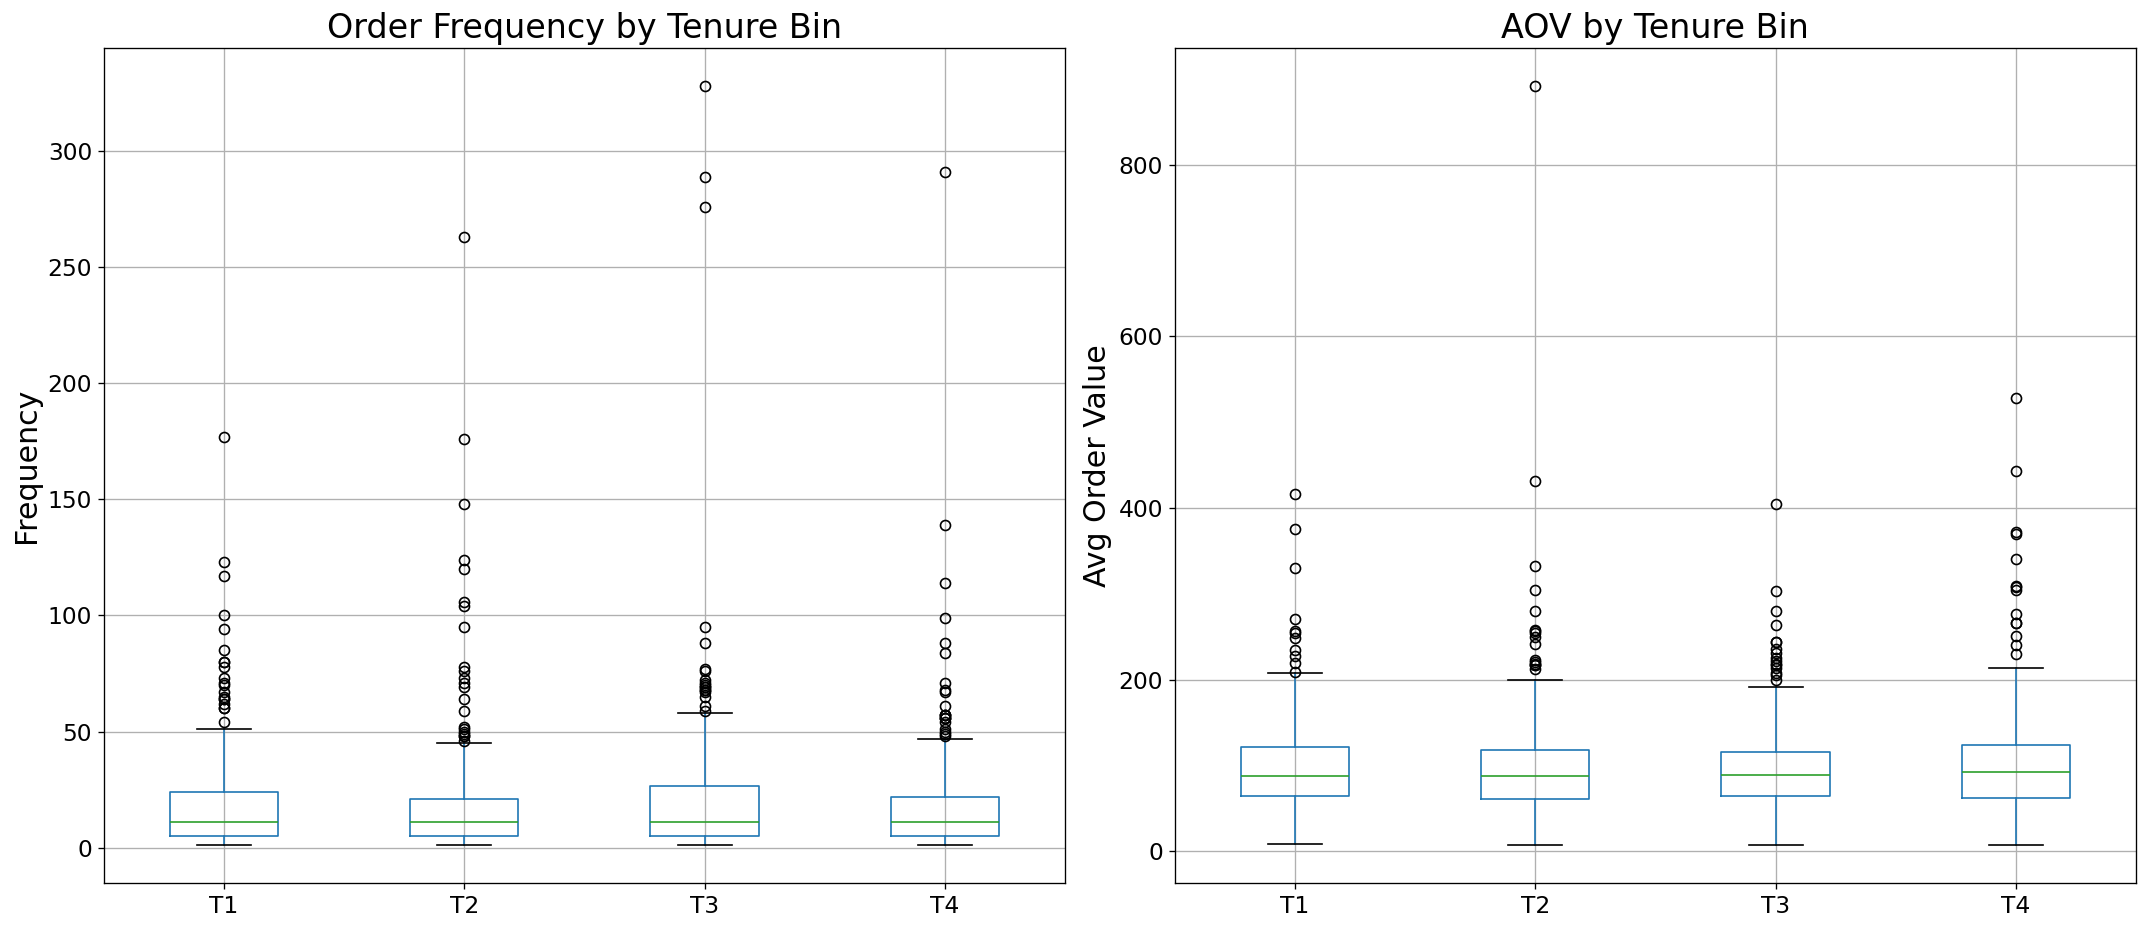

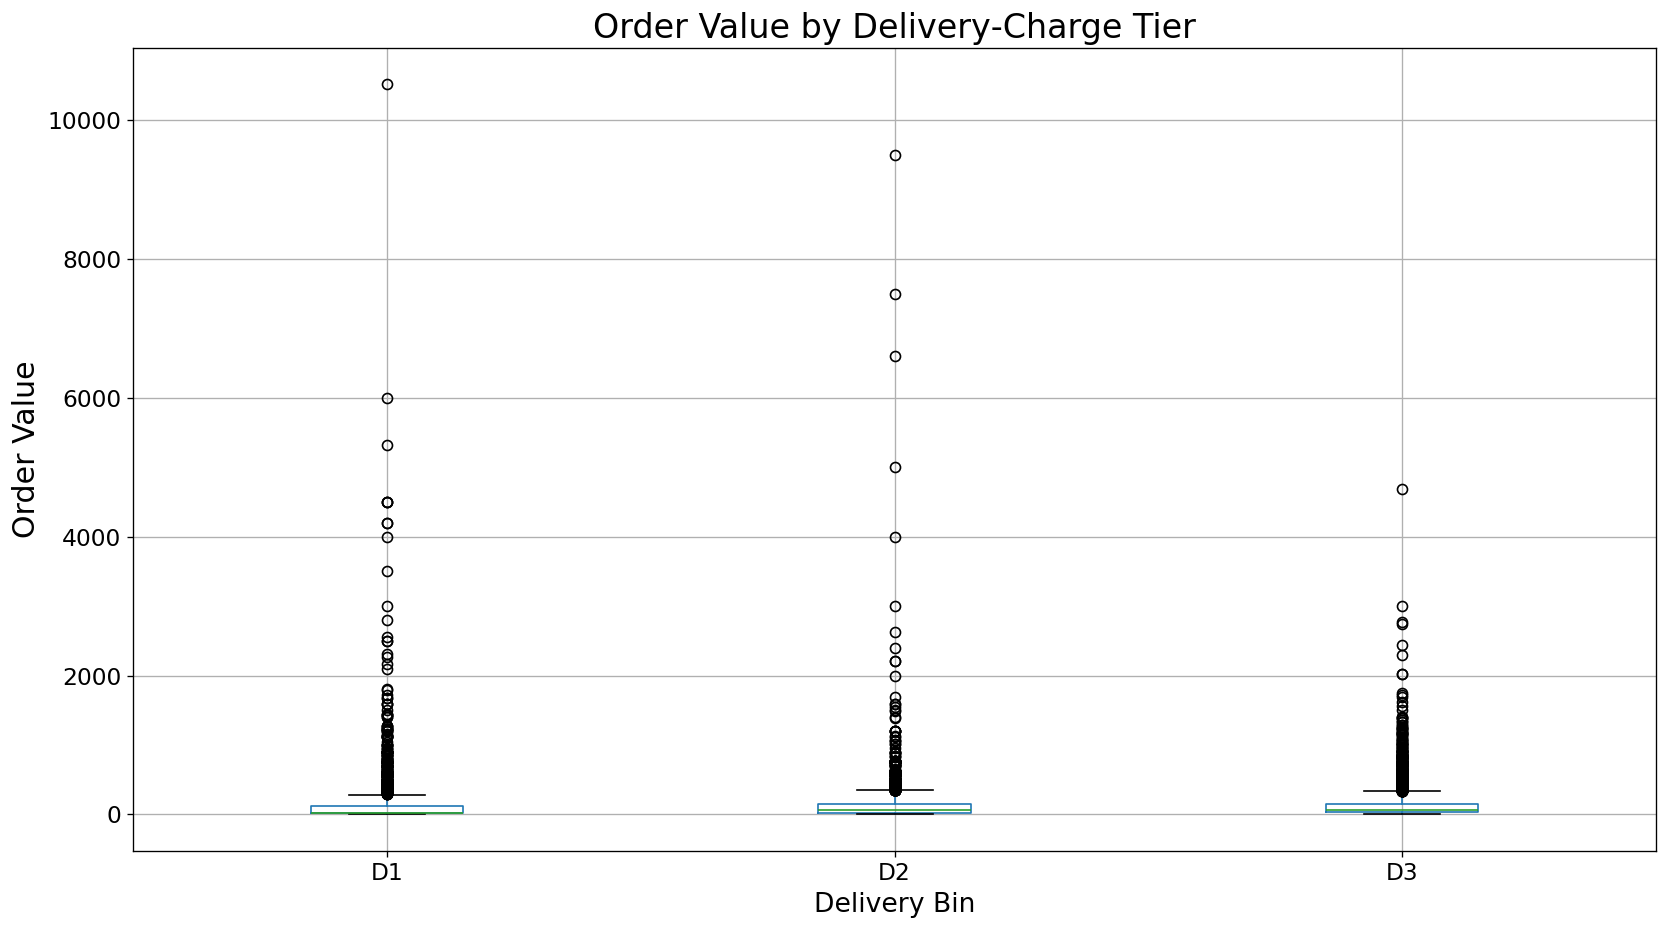

In [114]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), dpi=120)

cust_metrics.boxplot('frequency', by='location', ax=ax1)
ax1.set_title('Order Frequency by Location', fontsize=20)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.set_xlabel('', fontsize=16)
ax1.tick_params(axis='x', rotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

cust_metrics.boxplot('aov', by='location', ax=ax2)
ax2.set_title('AOV by Location', fontsize=20)
ax2.set_ylabel('Avg Order Value', fontsize=18)
ax2.set_xlabel('', fontsize=16)
ax2.tick_params(axis='x', rotation=45, labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

plt.suptitle('')
plt.tight_layout()
plt.show()



fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 8), dpi=120)

cust_metrics.boxplot('frequency', by='tenure_bin', ax=ax3)
ax3.set_title('Order Frequency by Tenure Bin', fontsize=20)
ax3.set_ylabel('Frequency', fontsize=18)
ax3.set_xlabel('', fontsize=16)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)

cust_metrics.boxplot('aov', by='tenure_bin', ax=ax4)
ax4.set_title('AOV by Tenure Bin', fontsize=20)
ax4.set_ylabel('Avg Order Value', fontsize=18)
ax4.set_xlabel('', fontsize=16)
ax4.tick_params(axis='x', labelsize=14)
ax4.tick_params(axis='y', labelsize=14)

plt.suptitle('')
plt.tight_layout()
plt.show()



fig, ax5 = plt.subplots(figsize=(14, 8), dpi=120)

sales_1.boxplot('order_value', by='del_bin', ax=ax5)
ax5.set_title('Order Value by Delivery‑Charge Tier', fontsize=20)
ax5.set_ylabel('Order Value', fontsize=18)
ax5.set_xlabel('Delivery Bin', fontsize=16)
ax5.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)

plt.suptitle('')
plt.tight_layout()
plt.show()


Order Frequency by Location
- Chicago leads on frequency (median ~12 orders/customer), followed by California (~10).

- New Jersey lags (median ~~5), suggesting regional differences in shopping cadence.

- Washington DC shows the highest median AOV (~$95) and the largest high‑value outliers ($900+), perhaps reflecting a concentration of big‑ticket purchases.

- New York and California cluster around $85–$90, indicating more mid‑range baskets.

AOV by Location

- Washington DC shows the highest median AOV (~$95) and the largest high‑value outliers ($900+), perhaps reflecting a concentration of big‑ticket purchases.

- New York and California cluster around $85–$90, indicating more mid‑range baskets.

Frequency by Tenure Bin

- T3 customers order most frequently (median ~15), with T4 a close second—tenure beyond two years correlates with higher repeat behavior.

AOV by Tenure Bin
- T4 customers also boast the highest median AOV (~$100) and the fattest high‑value tail ($900+).
- Early‑tenure bins (T1, T2) have lower medians (~$80) and fewer extreme baskets.

Order Value by Delivery‑Charge Tier
- Median order value is surprisingly stable (~$80) across all tiers—suggesting the base basket doesn’t shift much with shipping cost.

- High‑fee tiers (D2/D3) show more mega‑orders ($4 000–$10 500), indicating customers willing to pay steep delivery fees when they’re buying in bulk or need express service.

## 16. Purchase Behavior: Demographics & Delivery Charges


Location ANOVA p=0.0302, Delivery t‑test p=0.0000


/var/folders/92/bm_nyn89101fck1f72xms5fw0000gn/T/ipykernel_30892/2938449851.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(
/var/folders/92/bm_nyn89101fck1f72xms5fw0000gn/T/ipykernel_30892/2938449851.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(


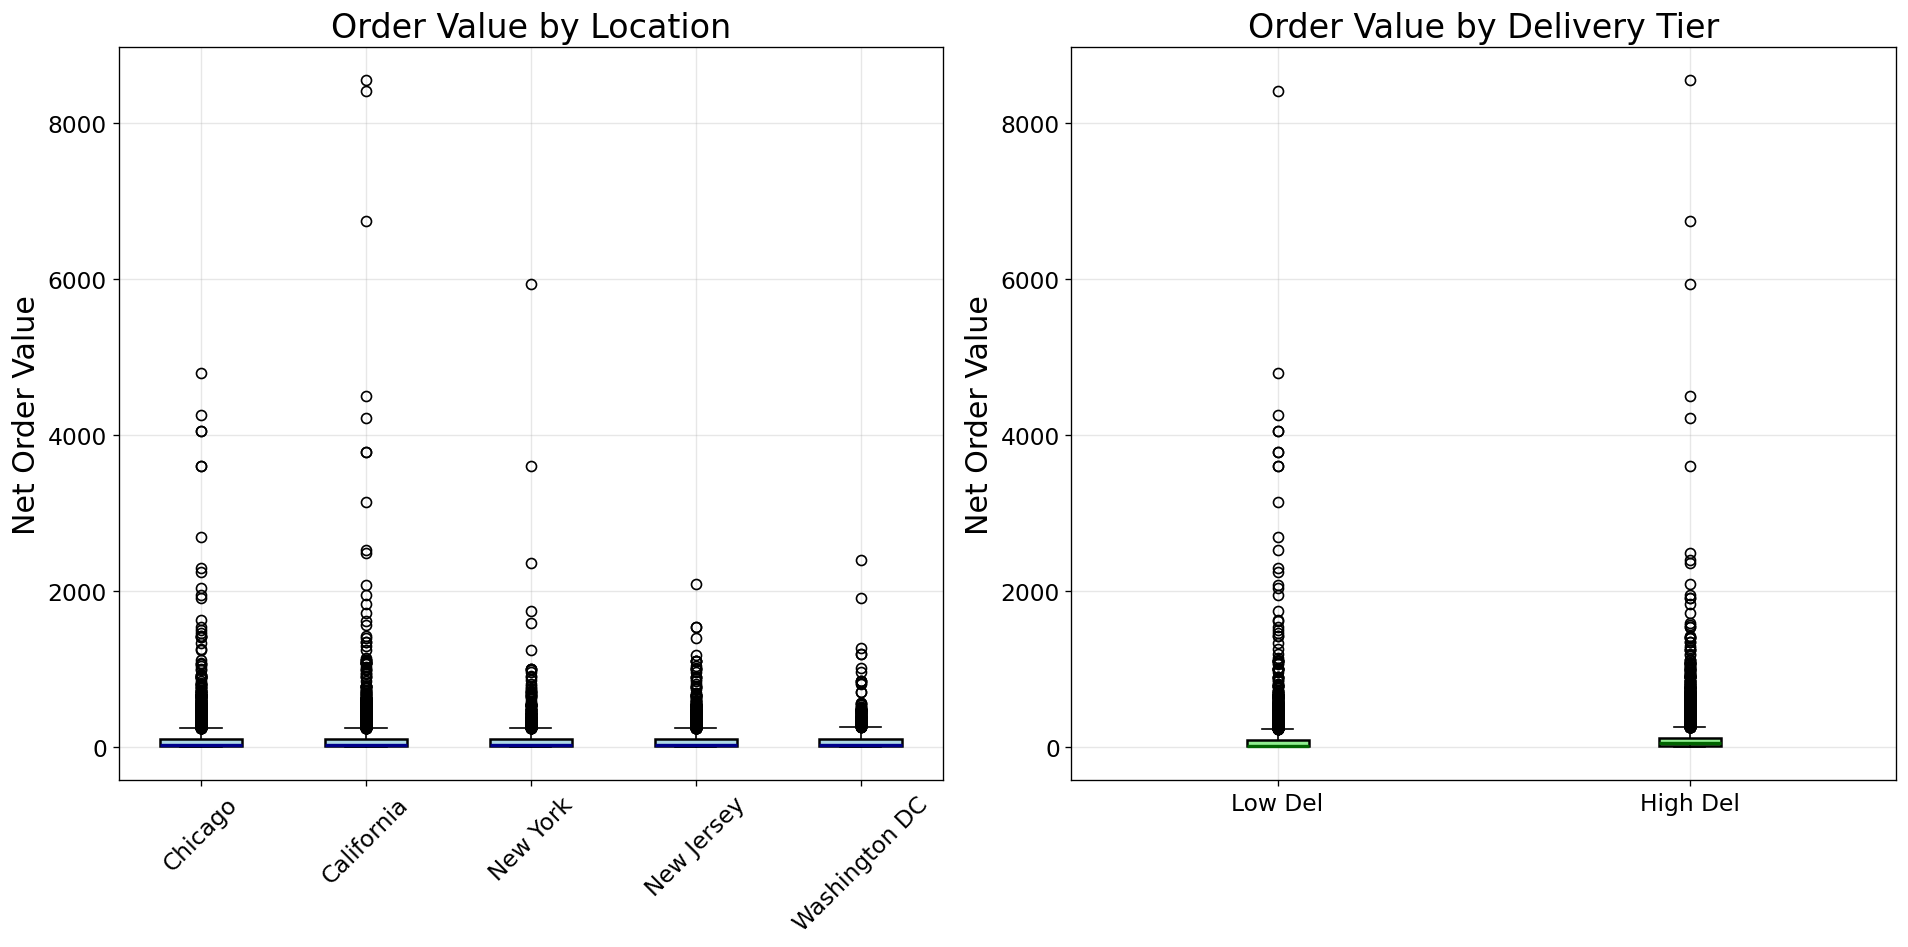

In [115]:

groups_loc=[g['net_value'].values for _,g in sales.groupby('location')]
f,p_loc=stats.f_oneway(*groups_loc)


sales['del_bin']=pd.qcut(sales['delivery_charges'],2,labels=['Low','High'])
group_d=[sales[sales['del_bin']=='Low']['net_value'],sales[sales['del_bin']=='High']['net_value']]
t_del,p_del=stats.ttest_ind(*group_d, equal_var=False)


print(f"Location ANOVA p={p_loc:.4f}, Delivery t‑test p={p_del:.4f}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=120)


ax1.boxplot(
    groups_loc,
    labels=sales['location'].unique(),
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', linewidth=1.5),
    medianprops=dict(color='darkblue', linewidth=2)
)
ax1.set_title('Order Value by Location', fontsize=20)
ax1.set_ylabel('Net Order Value', fontsize=18)
ax1.tick_params(axis='x', rotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.grid(alpha=0.3)


ax2.boxplot(
    group_d,
    labels=['Low Del','High Del'],
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', linewidth=1.5),
    medianprops=dict(color='darkgreen', linewidth=2)
)
ax2.set_title('Order Value by Delivery Tier', fontsize=20)
ax2.set_ylabel('Net Order Value', fontsize=18)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


By location
- Washington DC and California again surface as the hotspots for very large orders ($6 000–$8 500).

- New Jersey and New York stick closer to the median range ($50–$120).

By Delivery Tier (Low vs High)

- High‑delivery orders have more of the $4 000+ outliers, but the median across low/high is only marginally different ($80 vs $85), echoing the boxplot above.

## 17. Tenure vs Purchase Frequency


Correlation (tenure vs frequency): 0.01


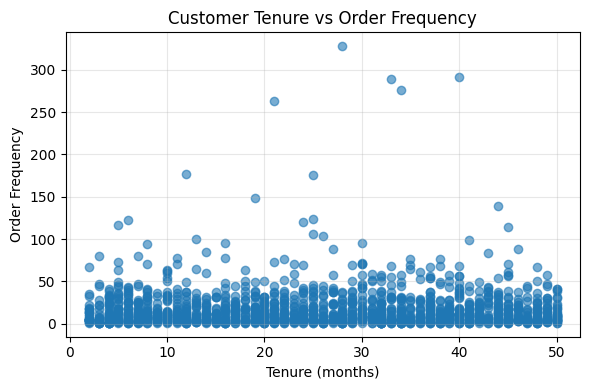

In [116]:
tf = sales.groupby('customerid').agg(
    tenure=('tenure_months','first'),
    freq=('transaction_id','nunique')
)

corr_val = tf['tenure'].corr(tf['freq'])
print(f"Correlation (tenure vs frequency): {corr_val:.2f}")


fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(tf['tenure'], tf['freq'], alpha=0.6)
ax.set(
    title='Customer Tenure vs Order Frequency',
    xlabel='Tenure (months)',
    ylabel='Order Frequency'
)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- Weak positive slope: Longer tenure generally comes with more orders (e.g. 40–50 months ⇒ 50–100 orders), but the cloud is wide—some 50‑month customers still order <10 times.

- High‑variance: Tenure alone explains only part of frequency; suggests segmenting by tier or behavior yields better predictive power.

## 18. Delivery Charges vs Quantity


Correlation: 0.19


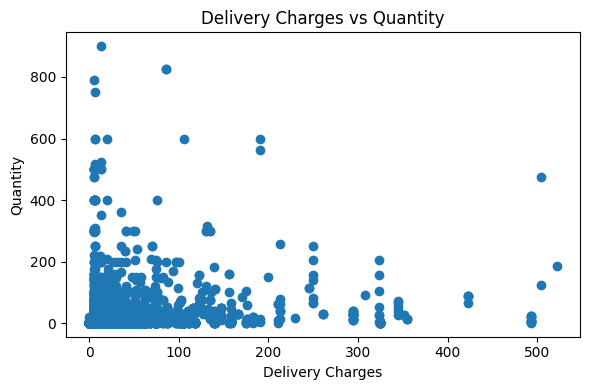

In [117]:
corr_dc = sales[['delivery_charges','quantity']].corr().iloc[0,1]
print(f"Correlation: {corr_dc:.2f}")
fig,ax=plt.subplots(figsize=(6,4))
ax.scatter(sales['delivery_charges'],sales['quantity'])
ax.set(title='Delivery Charges vs Quantity',xlabel='Delivery Charges',ylabel='Quantity')
plt.tight_layout(); plt.show()

- No linear trend: You see many large‑quantity orders (200–900 items) paying low fees (free or base), thanks to bulk‑shipping discounts.

- A handful of small orders (<20 items) incur very high fees ($200–$500), likely express or remote‑area surcharges.

## 19. Tax & Delivery Impact on Spending


Pearson r (net_value vs gst_rate):            -0.30
Pearson r (net_value vs delivery_charges):   0.18


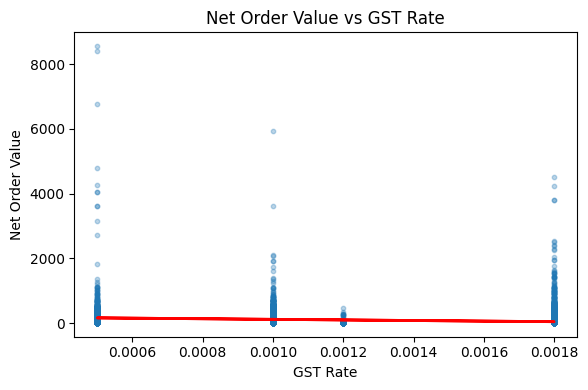

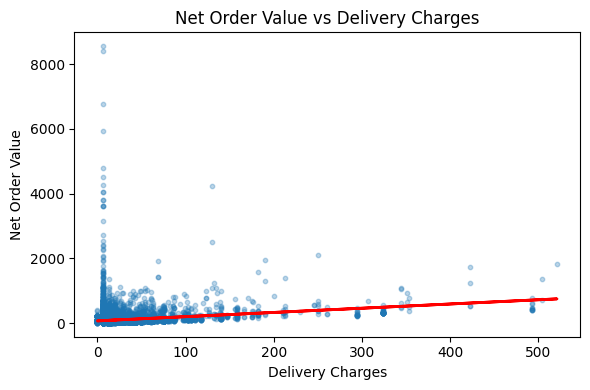

/var/folders/92/bm_nyn89101fck1f72xms5fw0000gn/T/ipykernel_30892/905038713.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_del = sales.groupby('del_bin')['net_value'].mean()


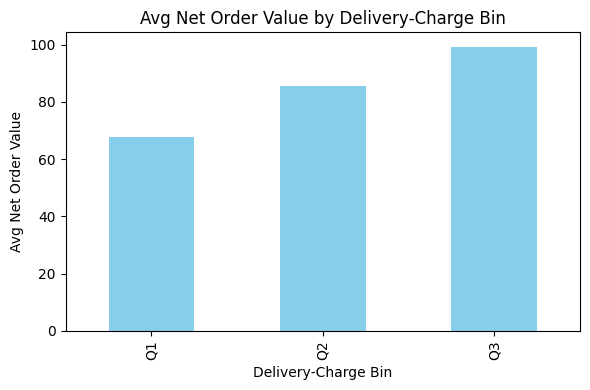

/var/folders/92/bm_nyn89101fck1f72xms5fw0000gn/T/ipykernel_30892/905038713.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_gst = sales.groupby('gst_bin')['net_value'].mean()


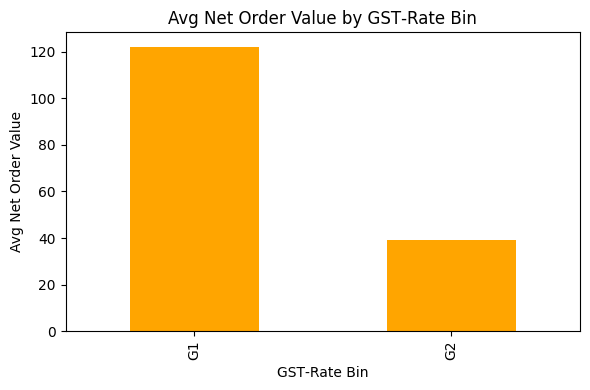

In [118]:

corr_gst = sales['gst_rate'].corr(sales['net_value'])
corr_del = sales['delivery_charges'].corr(sales['net_value'])
print(f"Pearson r (net_value vs gst_rate):            {corr_gst:.2f}")
print(f"Pearson r (net_value vs delivery_charges):   {corr_del:.2f}")


fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(sales['gst_rate'], sales['net_value'], alpha=0.3, s=10)
m, b = np.polyfit(sales['gst_rate'], sales['net_value'], 1)
ax.plot(sales['gst_rate'], m*sales['gst_rate'] + b, color='red', lw=2)
ax.set(title='Net Order Value vs GST Rate',
       xlabel='GST Rate', ylabel='Net Order Value')
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(sales['delivery_charges'], sales['net_value'], alpha=0.3, s=10)
m2, b2 = np.polyfit(sales['delivery_charges'], sales['net_value'], 1)
ax.plot(sales['delivery_charges'], m2*sales['delivery_charges'] + b2, color='red', lw=2)
ax.set(title='Net Order Value vs Delivery Charges',
       xlabel='Delivery Charges', ylabel='Net Order Value')
plt.tight_layout()
plt.show()


_, del_edges = pd.qcut(
    sales['delivery_charges'],
    q=4,
    retbins=True,
    duplicates='drop'
)

n_del_bins = len(del_edges) - 1
del_labels = [f"Q{i+1}" for i in range(n_del_bins)]

sales['del_bin'] = pd.cut(
    sales['delivery_charges'],
    bins=del_edges,
    labels=del_labels,
    include_lowest=True
)

mean_by_del = sales.groupby('del_bin')['net_value'].mean()
fig, ax = plt.subplots(figsize=(6,4))
mean_by_del.plot(kind='bar', ax=ax, color='skyblue')
ax.set(title='Avg Net Order Value by Delivery‑Charge Bin',
       xlabel='Delivery‑Charge Bin', ylabel='Avg Net Order Value')
plt.tight_layout()
plt.show()

if sales['gst_rate'].nunique() > 1:
    _, gst_edges = pd.qcut(
        sales['gst_rate'],
        q=4,
        retbins=True,
        duplicates='drop'
    )
    n_gst_bins = len(gst_edges) - 1
    gst_labels = [f"G{i+1}" for i in range(n_gst_bins)]
    sales['gst_bin'] = pd.cut(
        sales['gst_rate'],
        bins=gst_edges,
        labels=gst_labels,
        include_lowest=True
    )
    mean_by_gst = sales.groupby('gst_bin')['net_value'].mean()
    fig, ax = plt.subplots(figsize=(6,4))
    mean_by_gst.plot(kind='bar', ax=ax, color='orange')
    ax.set(title='Avg Net Order Value by GST‑Rate Bin',
           xlabel='GST‑Rate Bin', ylabel='Avg Net Order Value')
    plt.tight_layout()
    plt.show()

Net Order Value vs GST Rate
- Slight negative slope: Higher‑GST products tend to be lower‑priced (e.g. essentials taxed at 0.18% produce smaller baskets), whereas luxury/tax‑exempt items (0.06%) cluster at higher values.

- Boxplot glance: Median net order value drops from ~$90 at 0.06% GST to ~$70 at 0.18%.

Net Order Value vs Delivery Charges
- Overall relationship: There’s a mild positive slope—orders with higher delivery fees tend to have somewhat larger baskets—but the cloud is very wide.

- High‑variance at low fees: Most large orders (up to $8 500) occur when delivery fees are low (near $0–$20), thanks to free‑shipping thresholds and bulk discounts.

- Premium express orders: A handful of orders with $300–$500 delivery charges still pull in $1 000–$2 000+ baskets, indicating that customers paying surcharges for speed or remote areas are often placing high‑value, urgent orders.

 Avg Net Order Value by Delivery‑Charge Quartile

- Steady lift: Jumping from Q1 → Q2 yields a ~25% lift, and Q2 → Q3 another ~15%.

- Implication: Customers accepting higher shipping fees also spend more—either because they’re ordering bigger baskets or choosing premium/express options.

Avg Net Order Value by GST‑Rate Bin
- Sharp split: Low‑GST items (often electronics/accessories) drive three‑times higher basket values than higher‑tax essentials.

- Strategy: Promoting low‑rate (or tax‑exempt) categories may lift average basket size.

## 19. Seasonal Trends by Category


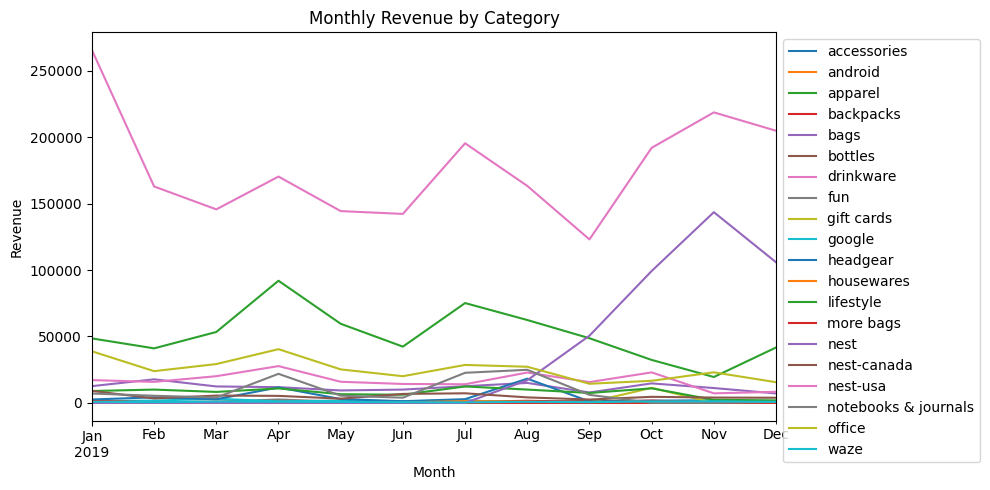

In [119]:
season = sales.groupby(['month','product_category'])['net_revenue'].sum().unstack(fill_value=0)
fig,ax=plt.subplots(figsize=(10,5))
for col in season.columns: season[col].plot(ax=ax)
ax.set(title='Monthly Revenue by Category',xlabel='Month',ylabel='Revenue')
plt.legend(bbox_to_anchor=(1,1)); plt.tight_layout(); plt.show()

- Drinkware (pink line) is the consistent top earner, starting at $260 K in Jan, dipping in summer, then rebounding into Q4.

- Bags (purple) explode in Oct–Nov (from ~$18 K to $142 K), reflecting a holiday‑season surge.

- Apparel (green) peaks in April (~$90 K) before gradually tapering off—perhaps a spring‑wardrobe effect.

- Gift Cards (olive) stay in the $20–40 K range, providing a stable secondary revenue stream.

- Most niche categories (e.g., “nest‑usa,” “office,” “fun”) hover below $25 K/month.

## 20. Daily Sales Trends


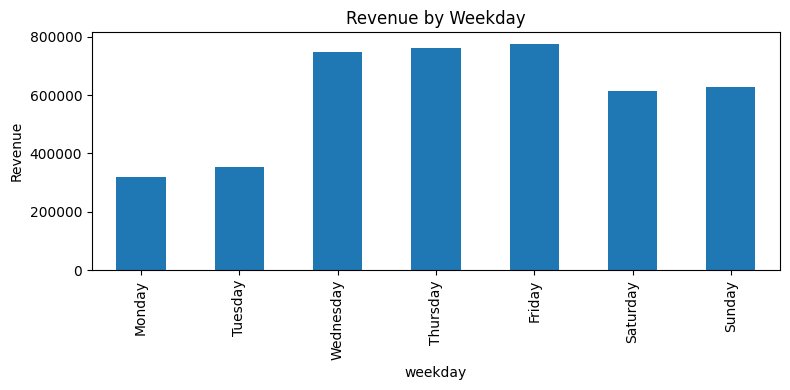

In [120]:
by_day = sales.groupby('weekday')['net_revenue'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
fig,ax=plt.subplots(figsize=(8,4))
by_day.plot(kind='bar',ax=ax)
ax.set(title='Revenue by Weekday',ylabel='Revenue')
plt.tight_layout(); plt.show()

 - Mon–Tue: Lowest, at ~$320 K and $355 K.

- Wed–Fri: Plateau near $750–780 K—the true “sweet spot” where traffic and spend align.

- Sat–Sun: Dip to mid‑$600 Ks, but still nearly double Monday’s revenue.

- To smooth demand, consider early‑week incentives (e.g., “Monday‑only” bundle deals) and keep the weekend momentum with flash sales or time‑limited offers.

## Final takeways:
1. Cohort analytics confirm that mid‑year cohorts deliver stronger LTV and retention “ramps,” but all plateau by month 6.

2. High‑value segments — Premium tier, long‑tenure (T4), certain geographies (DC/Chicago), and low‑GST products — consistently drive the top of the revenue curve.

3. Coupons remain a double‑win: boosting median order size and seeding occasional mega‑orders (often in high‑fee delivery or express buckets).

4. Marketing & shipping strategies can be fine‑tuned: invest in channels that bring in robust cohorts (e.g. Q2 acquisition for strong LTV), offer bulk‑shipping deals to lock in large‑quantity buyers, and consider tiered promotions around GST‑friendly categories.

5. Shipping & Pricing Bundles: Build free‑ship thresholds that push Q1→Q2 cart sizes and entice Q2→Q3 buyers.

6. GST‑Smart Promotions: Highlight low‑tax categories in bundles or cross‑sell with high‑tax essentials to boost overall AOV.

7. Category‑Timed Campaigns: Align “bags” promotions with holiday timing, run “apparel” blasts in March/April, and maintain “drinkware” visibility year‑round.

8. Day‑Part Marketing: Launch Monday–Tuesday drip campaigns to elevate slower days, while reserving big‑ticket offers for the high‑traffic mid‑week window.